In [1]:
import numpy as np
import tensorflow as tf

tf.random.set_seed(42)

tf.__version__

'2.3.1'

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [4]:
X = tf.convert_to_tensor(X, dtype = tf.float32, name = 'X')
y = tf.convert_to_tensor(y, dtype = tf.float32, name = 'y')

In [5]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [6]:
W = {'oculta': tf.Variable(tf.random.normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'), 
     'saida': tf.Variable(tf.random.normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}

In [7]:
type(W)

dict

In [8]:
type(W['oculta'])

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [9]:
W['oculta']

<tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.3274685, -0.8426258,  0.3194337],
       [-1.4075519, -2.3880599, -1.0392479]], dtype=float32)>

In [10]:
W['saida']

<tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.08422458],
       [-0.86090374],
       [ 0.37812304]], dtype=float32)>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


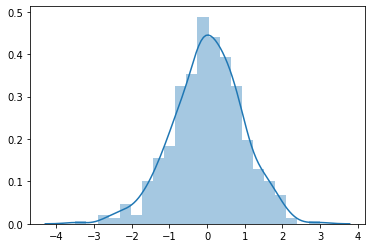

In [11]:
distribuicao = np.random.normal(size = 500)
import seaborn as sns
sns.distplot(distribuicao)

In [12]:
b = {'oculta': tf.Variable(tf.random.normal([neuronios_oculta]), name = 'b_oculta'),
     'saida': tf.Variable(tf.random.normal([neuronios_saida]), name = 'b_saida')}

No link a seguir, os desenvolvedores do TensorFlow falam que os otimizadores que antes estavam em `tf.train` passaram para dentro da API do Keras: https://www.tensorflow.org/guide/migrate#keras_optimizers

As métricas de perda também estão exclusivamente na API do Keras, não mais em `tf.losses`: https://www.tensorflow.org/guide/migrate#new-style_metrics_and_losses

In [13]:
otimizador = tf.keras.optimizers.SGD(learning_rate = 0.3)

for epoca in range(10000):

    # Todas as operações que fazem parte do grafo (forward pass até o cálculo do erro) devem
    # ser feitas dentro da invocação de `tf.GradientTape()`gddddd, para que os gradientes sejam gravados.
    with tf.GradientTape() as tape:
        camada_oculta = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
        camada_oculta_ativacao = tf.sigmoid(camada_oculta)
        camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
        camada_saida_ativacao = tf.sigmoid(camada_saida)
        erro = tf.keras.losses.MSE(y, camada_saida_ativacao)

    # Vou salvar as variáveis (pesos e biases que são atualizados) em uma variável para facilitar
    # chamá-las depois
    var_list = [W['oculta'], W['saida'], b['oculta'], b['saida']]
    
    # Cálculo dos gradientes
    gradientes = tape.gradient(erro, var_list)
    
    # Atualização das variáveis (backpropagation)
    otimizador.apply_gradients(zip(gradientes, var_list))

    if epoca % 200 == 0:
        erro_medio = tf.reduce_mean(erro).numpy()
        print(erro_medio)

0.29839364
0.24481094
0.14319457
0.023573052
0.009402739
0.005542226
0.0038509206
0.002922711
0.0023426323
0.0019482691
0.0016638851
0.0014496949
0.0012828936
0.0011495099
0.001040543
0.00094993203
0.00087345106
0.0008080733
0.00075157266
0.00070227263
0.00065889704
0.0006204481
0.00058614335
0.0005553502
0.00052756537
0.0005023702
0.00047942164
0.00045843647
0.00043917628
0.0004214376
0.00040504712
0.00038986193
0.00037575123
0.0003626073
0.00035033628
0.0003388527
0.0003280844
0.00031796983
0.00030844702
0.00029946893
0.00029098958
0.00028296927
0.00027537293
0.00026816496
0.0002613193
0.00025480922
0.00024861027
0.00024270167
0.00023706231
0.00023167527


In [14]:
W

{'oculta': <tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 5.0396805, -3.3243032,  6.595422 ],
        [-6.5484786, -4.0132656, -5.0877705]], dtype=float32)>,
 'saida': <tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32, numpy=
 array([[-9.42384 ],
        [ 3.501946],
        [ 8.993401]], dtype=float32)>}

In [15]:
b

{'oculta': <tf.Variable 'b_oculta:0' shape=(3,) dtype=float32, numpy=array([-2.3282068 ,  0.38672784,  2.1303089 ], dtype=float32)>,
 'saida': <tf.Variable 'b_saida:0' shape=(1,) dtype=float32, numpy=array([-4.5760903], dtype=float32)>}

In [16]:
# teste
camada_oculta_teste = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W['saida']), b['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [17]:
camada_saida_ativacao_teste

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.9910823 ],
       [0.01725066],
       [0.01413813],
       [0.98185897]], dtype=float32)>